# Исследование объявлений о продаже квартир

Цель проекта -  определить, какие параметры влияют на рыночную стоимость недвижимости.
Исходные данные: данные сервиса Яндекс недвижимость с архивом объявлений о продаже квартир в Санкт-Петербурге и окрестностях. 

### Оглавление
* [Шаг 1. Открытие файла с данными и изучение общей информации](#h1_1)
* [Шаг 2. Предобработка данных](#h1_2)
* [Шаг 3. Посчитайте и добавьте в таблицу](#h1_3)
* [Шаг 4. Исследовательский анализ данных и выполнение инструкций](#h1_4)
* [Шаг 5. Общий вывод](#h1_5)

### Общие функции для работы с данными

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import numpy as np

# Функция print_hist для вывода гистограмм
#  - data - датафрейм или колонка
#  - bins_count - число корзин гистограммы
#  - size - размер рисунка
#  - title - заголовок гистограммы
#  - x_name - название оси абсцисс
#  - y_name - названи оси ординат


def print_hist(data, bins_count, size, plot_title, x_name, y_name):
    data.hist(bins = bins_count, figsize=size)
    plt.grid(True)
    plt.title(plot_title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

# Функция print_plot для вывода графиков
#  - data - датафрейм или колонка
#  - plot_kind - тип графика
#  - plot_title - заголовок графика
#  - x_name - название оси абсцисс
#  - y_name - названи оси ординат
def print_plot(data, plot_kind, plot_title, x_name, y_name, size=(10, 5)):
    plot = data.plot(kind=plot_kind, title=plot_title, grid=True, figsize=size)
    plot.set_xlabel(x_name)
    plot.set_ylabel(y_name)
    print(plot)

## Шаг 1. Открытие файла с данными и изучение общей информации <a class="anchor" id="h1_1"></a>

In [100]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

Посмотрим общую информацию:

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что в во множестве колонок есть пропущенные значения. Также есть вопросы по типам некоторых колонок.
Посмотрим на записи:

In [102]:
# Максимальное количество отображаемых столбцов по умолчанию - 20. А у нас их больше. Снимем данное ограничение следующей настройкой:
pd.set_option('display.max_columns', None)
# Покажем первые 10 записей:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

На основе общей информации видно, что
* В данных 23699 записи. Такой выборки должно хватить для наших задач.
* В то же время в данных имеются пропущенные значения в 14 колонках из 22. В некоторых колонках таких значений большая часть, поэтому не стоит удалять все записи с пропусками, особенно в тех колонках, которые мы не будем использовать для анализа. Надо подумать, можно ли корректно заполнить пропуски в тех колонках, которые нам потребуются непосредственно для задач нашего исследования
* Колонка `floors_total` имеет тип `float`, хотя для нее достаточно `int` (например, не может быть в здании 5.3 этажей). Аналогично по колонке `ponds_around3000`
* В значениях даты публикации объявления `first_day_exposition` находятся нули вместо параметров времени (часов, минут, секунд). Т.е. есть смысл преобразовать его к простой дате. Также в эта колонка имеет строковый тип, необходимо привести ее к типу даты, чтобы было удобнее работать с этим значением (например, рассчитывать разницу между датами).

## Шаг 2. Предобработка данных <a class="anchor" id="h1_2"></a>

### 2.1. Заполнение пропущенных значений

#### Высота потолков (`ceiling_height`)
Из общих данных видно, что у порядка 9000 записей высота потолков не заполнена.
Проверим характеристики данной величины, чтобы понять, можно ли заменить на какое-то значение.

In [103]:
print(df['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Подавляющее большинство записей находятся в узком диапазоне от 2.5 до 2.8 м. Мы не будем использовать данный параметр для оценки влияния на стоимость, поэтому пока не станем заполнять пропуски.

#### Количество комнат (`rooms`)
Посмотрим, какие присутствуют значения в данной колонке.

In [104]:
print(df['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


В данных имеются нулевые значения. Рассмотрим их подробнее:

In [105]:
df.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Похоже, что все объявления из этих примеров имеют небольшую площадь квартиры. Проверим данное предположение:

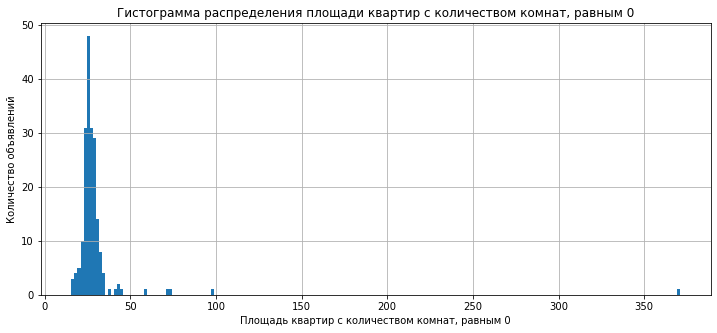

In [106]:
print_hist(df.query('rooms == 0')['total_area'], 200, (12,5),'Гистограмма распределения площади квартир с количеством комнат, равным 0', 'Площадь квартир с количеством комнат, равным 0', 'Количество объявлений')

Действительно, большинство таких значений - квартиры до 40 кв. м. Заменим для таких квартир число комнат на 1.

In [108]:
df.loc[df.rooms == 0 , 'rooms'] = 1

#### Количество балконов (`balcony`)

Посмотрим подробнее на распределение значений в данном столбце:

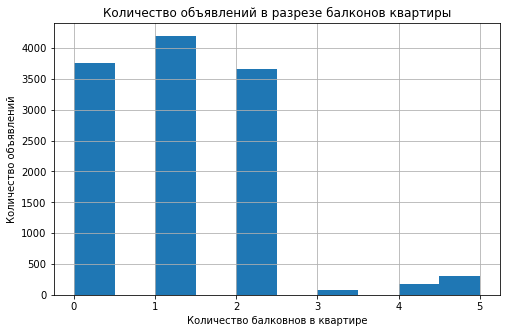

In [109]:
print_hist(df['balcony'], 10, (8,5),'Количество объявлений в разрезе балконов квартиры', 'Количество балковнов в квартире', 'Количество объявлений')

Можно предположить, что если количество балконов не указано, то значит его нет. Тогда пропущенные значения в данном столбце можно было бы заменить на 0. Но с учетом большого количества пропусков в данном столбце такая замена очень сильно повлияет на распределение значений. Если нам потребуется исследовать данный столбец, то это сильно повлияет на результаты анализа. Поэтому пока предлагаю оставить данный столбец как есть.

#### Признак апартаментов (`is_apartment`)
Посчитаем, у скольких значений заполнено данное поле

In [110]:
print(df['is_apartment'].value_counts())
print('Доля апартаментов среди заполненных значений: {:.0%}'.format(df['is_apartment'][df['is_apartment'] == True].count()/df['is_apartment'][df['is_apartment'] != pd.NA].count()))

False    2725
True       50
Name: is_apartment, dtype: int64
Доля апартаментов среди заполненных значений: 2%


Всего у 2% из заполненных значений проставлен флаг апартаментов. Действительно, среди предложений недвижимости апартаментов не так много. Но заполнять пропуски в этом поле было бы не совсем корректно:
1. во-первых, пустых значений слишком много
2. во-вторых, на основе существующих данных сложно сказать, какие объекты являются апартаментами. Разве что цена на них обычно ниже, чем у объектов под жилое строительство.
3. в объявлениях зачастую скрывают, что объект является апартаментами, поскольку данная недвижимость менее привлекательна из-за невозможности регистрации в ней.
Мы не будем использовать признак апартаментов в дальнейшем анализе (хотя, как упомянул выше, он может заметно влиять на стоимость недвижимости), поэтому предлагаю не заполнять пустые значения в данной колонке.

#### Сколько дней было размещено объявление (от публикации до снятия) (`days_exposition`)
Наиболее вероятно, что пропуски в данной колонке обусловлены присутствием в наших данных объявлений, которые еще не были сняты с публикации. На шаге 4 мы подробнее рассмотрим данную гипотезу. А пока не будем заполнять пропуски в данном параметре. 

####  Число водоёмов в радиусе 3 км (`ponds_around3000`)
Будем считать, что если данный параметр не указан, то водоемов вблизи объекта нет. Поэтому заполним пустые значения нулями:

In [111]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

#### Число парков в радиусе 3 км (`parks_around3000`)
Будем считать, что если данный параметр не указан, то парков вблизи объекта нет. Поэтому заполним пустые значения нулями:

In [112]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)

#### Всего этажей в доме (`floors_total`)
Таких пропусков совсем немного в датасете. В виду того, что мы будем использовать данный параметр далее, то удалим эти записи из датасета.

In [113]:
df.dropna(subset = ['floors_total'], inplace = True)

#### Название населённого пункта (`locality_name`)
Объявлений с пустым населенным пунктом не так много. Но посмотрим на них подробнее.

In [114]:
df[df['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


В данных записях не видно чего-то особенного, что бы выделяло их среди других.
Населенный пункт очень важен для дальнейшего исследования. Поэтому удалим записи с пустыми значениями.

In [115]:
df.dropna(subset = ['locality_name'], inplace = True)

####  Расстояние до центра города (м) (`cityCenters_nearest`)

In [116]:
print('Количество объявлений с пустой колонкой расстояния до центра:',sum(df['cityCenters_nearest'].isna()))

Количество объявлений с пустой колонкой расстояния до центра: 5501


Посмотрим, в каких населенных пунктах имеются объявления с пустым значением расстояния до центра. Возможно это населенные пункты, которые не являются городами. Для этого выведем 10 самых популярных по количеству объявлений населенных пунктов без отметки о расстоянии до центра.

In [117]:
df[df['cityCenters_nearest'].isna()].groupby('locality_name')['last_price'].agg(['count','mean']).sort_values(by='count', ascending = False).head(10)

,count,mean
locality_name,,
посёлок Мурино,520,3.671211e+06
Всеволожск,398,3.789068e+06
Гатчина,307,3.488337e+06
деревня Кудрово,299,4.234158e+06
Выборг,237,3.250983e+06
Кудрово,171,4.566009e+06
деревня Новое Девяткино,143,3.879257e+06
Сертолово,142,3.652432e+06
Кириши,125,1.834624e+06


Как видно, тут есть как города, так и небольшие населенные пункты.
Похоже, что данное значение просто не было заполнено вследствие определенных причин (например, создатель объявления не указал на карте продаваемый объект, из-за чего стало невозможным рассчитать расстояние до центра).
Попробуем заполнить пропуски медианным значением по населенному пункту:

In [118]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))
print('Количество объявлений с пустой колонкой расстояния до центра (после заполнения пропусков медианным значением):',sum(df['cityCenters_nearest'].isna()))

Количество объявлений с пустой колонкой расстояния до центра (после заполнения пропусков медианным значением): 5432


Получилось убрать совсем немного пропусков. 
Предлагаю не удалять остальные записи с пропусками, чтобы можно было использовать эти данные в исследовании других параметров.

#### Площадь кухни в квадратных метрах (м²) (`kitchen_area`)

In [119]:
print('Количество объявлений с пустой колонкой площади кухни:',sum(df['kitchen_area'].isna()))

Количество объявлений с пустой колонкой площади кухни: 2222


Заполним данные пропуски средними значением в зависимости от числа комнат в квартире. Для начала посмотрим на эти средние значения:

In [120]:
df.groupby('rooms')['kitchen_area'].agg(['count','mean'])

,count,mean
rooms,,
1,7195,9.544076
2,7257,9.970915
3,5356,11.292920
4,1075,13.672140
5,285,18.367649
6,96,21.098229
7,52,21.998077
8,9,24.866667
9,7,25.071429


Для каждого значения числа комнат есть среднее. Теперь заполним пропуски площади кухни:

In [121]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('mean'))
print('Количество объявлений с пустой колонкой площади кухни:',sum(df['kitchen_area'].isna()))

Количество объявлений с пустой колонкой площади кухни: 0


Все пропуски в колонке *kitchen_area* заполнены.

#### Жилая площадь в квадратных метрах(м²) (`living_area`)

In [122]:
print('Количество объявлений с пустой колонкой жилой площади:',sum(df['living_area'].isna()))

Количество объявлений с пустой колонкой жилой площади: 1865


Поступим аналогично площади кухни, заполнив пропуски средними значениями в зависимости от числа квартир. 
Проверим средние значения:

In [123]:
df.groupby('rooms')['living_area'].agg(['count','mean'])

,count,mean
rooms,,
1,7541,17.922943
2,7265,31.731865
3,5339,47.374108
4,1082,66.994806
5,292,100.009247
6,98,131.799796
7,53,163.564151
8,12,168.683333
9,7,190.257143


In [124]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('mean'))
print('Количество объявлений с пустой колонкой жилой площади:',sum(df['living_area'].isna()))

Количество объявлений с пустой колонкой жилой площади: 0


Пропуски жилой площади заполнены.

#### Другие параметры
Также в датасете присутсвуют пропуски в параметрах, которые мы не будем использовать в дальнейших исследованиях. Поэтому предлагаю не заполнять и не удалять данные в этих колонках.
Это следующие колонки:
* `is_apartment`
* `balcony`
* `airports_nearest`
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`

### 2.2. Приведение данных к нужным типам

#### `first_day_exposition`

В данной колонке информативной является только дата, т.к. на месте времени стоят нули. Приведем значение в данной колонке к формату даты:

In [125]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

Проверим, что получилось в результате преобразования:

In [126]:
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### `floors_total`
Преобразуем данную колонку к типу int

In [127]:
df['floors_total'] = df['floors_total'].astype('int')

#### `ponds_around3000`
Преобразуем данную колонку к типу int

In [128]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

#### `parks_around3000`
Преобразуем данную колонку к типу int

In [129]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

In [130]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Выводы по шагу 2
В результате проведенной предобработки выполнено следующее:
1. Обработаны пропуски в колонках:
    * Высота потолков (`ceiling_height`) - подавляющее большинство записей находятся в узком диапазоне. Пропуски заполнены медианным значением
    * Количество комнат (`rooms`) - нулевые значения замены на 1 ввиду того, что большинство таких квартир имеют очень небольшую площадь
    * Количество балконов (`balcony`) - принято решение не заполнять данный параметр, поскольку он не будет использоваться для анализа.
    * Число водоёмов в радиусе 3 км (`ponds_around3000`) - пустые значения заполнены нулями
    * Число парков в радиусе 3 км (`parks_around3000` - пустые значения заполнены нулями
    * Всего этажей в доме (`floors_total`) - записи с пустыми значениями удалены
    * Название населённого пункта (`locality_name`) - записи с пустыми значениями удалены
    * Расстояние до центра города (м) (`cityCenters_nearest`) - часть значений заполнены медианными значениями по конкретным населенным пунктам
    * Площадь кухни в квадратных метрах (м²) (`kitchen_area`) - пропуски заполнены средними значением в зависимости от числа комнат в квартире
    * Жилая площадь в квадратных метрах(м²) (`living_area`) - пропуски заполнены средними значением в зависимости от числа комнат в квартире

2. Пропуски не заполнены в следующих колонках (данные параметры не используются в нашем исследовании):
    * Сколько дней было размещено объявление (от публикации до снятия) (days_exposition) - значения в пропусках проанализированы на шаге 4
    * `is_apartment`
    * `balcony`
    * `airports_nearest`
    * `parks_around3000`
    * `parks_nearest`
    * `ponds_around3000`
    * `ponds_neares`
3. Проведено преобразование типов данных в следущих колонках
    * `first_day_exposition` - приведен к формате даты
    * `floors_total` - приведен к типу int
    * `ponds_around3000` - приведен к типу int
    * `parks_around3000` - приведен к типу int

## Шаг 3. Посчитайте и добавьте в таблицу <a class="anchor" id="h1_3"></a>

### Цена квадратного метра

Добавим в датасет колонку `price_meter`, заполнив ее значением цены квадратного метра:

In [131]:
df['price_meter'] = df['last_price'] / df['total_area']

Посмотрим основные характеристики цены квадратного метра и построим гистограмму распределения:

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_meter, dtype: float64


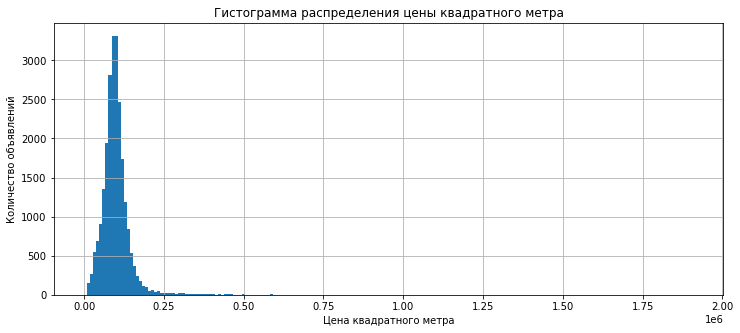

In [132]:
print(df['price_meter'].describe())
print_hist(df['price_meter'], 200, (12,5),'Гистограмма распределения цены квадратного метра', 'Цена квадратного метра', 'Количество объявлений')

В среднем цена квадратного метра составляет 95 тыс. руб. Распределение величины похоже на пуассоновское.

### День недели, месяц и год публикации объявления

Добавим колонки:
* `exposition_year` - год публикации объявления
* `exposition_month` - месяц публикации объявления
* `exposition_weekday` - день недели публикации объявления

In [133]:
df['exposition_year'] = df['first_day_exposition'].dt.year
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

Построим гистограмму распределенная дня недели, в который было размещено объявление:

AxesSubplot(0.125,0.125;0.775x0.755)


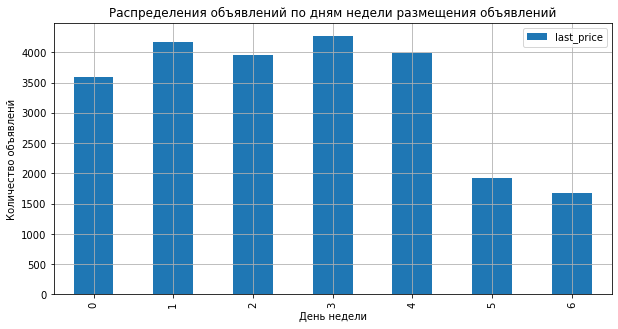

In [134]:
print_plot(df
    .pivot_table(index='exposition_weekday', values='last_price', aggfunc='count')
    ,'bar','Распределения объявлений по дням недели размещения объявлений','День недели','Количество объявленй'
)

В выходные дни количество размещаемых объявлений резко падает: риэлторы отдыхают от работы.

Построим гистограмму распределенная года размещения объявления:

AxesSubplot(0.125,0.125;0.775x0.755)


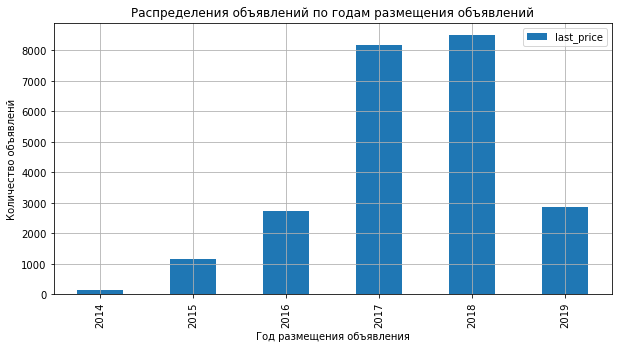

In [135]:
print_plot(df
    .pivot_table(index='exposition_year', values='last_price', aggfunc='count')
    ,'bar','Распределения объявлений по годам размещения объявлений','Год размещения объявления','Количество объявленй'
)

По гистограмме выше видно, что год от года количество размещаемых объявлений увеличивается. Уменьшение в 2019 году видимо связано с тем, что набор данных был сформирован как раз в этом году. Т.е. за 2019 год оценить количество размещенных объявлений нельзя.

AxesSubplot(0.125,0.125;0.775x0.755)


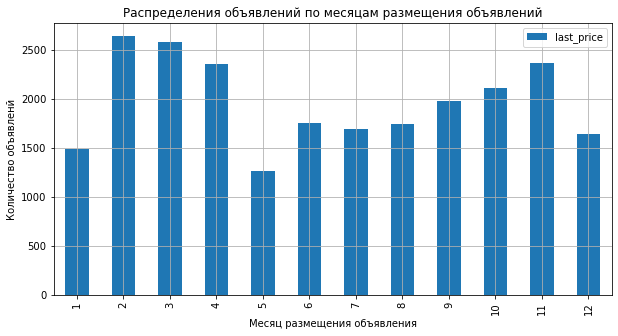

In [136]:
print_plot(df
    .pivot_table(index='exposition_month', values='last_price', aggfunc='count')
    ,'bar','Распределения объявлений по месяцам размещения объявлений','Месяц размещения объявления','Количество объявленй'
)

По гистограмме выше явно прослеживается сезонность работы рынка недвижимости: он затихает в летний период, а также на новогодние и майские праздники.

### Этаж квартиры; варианты — первый, последний, другой

Добавим колонку категории этажа квартиры - `floor_group`.

In [138]:
# сначала всю колонку заполняем значениями 'другой'
df['floor_group']= 'другой'
# если значение floor не равно 1, оставляем значение 'другой' без изменения, иначе заполняем значением 'первый'
df['floor_group']= df['floor_group'].where(df['floor'] != 1, 'первый')
# если значение floor не равно floors_total, оставляем значение 'другой' без изменения, иначе заполняем значением 'последний'
df['floor_group']= df['floor_group'].where(df['floor'] != df['floors_total'], 'последний')

Посмотрим, сколько значений каждой категории получилось в итоге:

другой       17326
последний     3355
первый        2884
Name: floor_group, dtype: int64


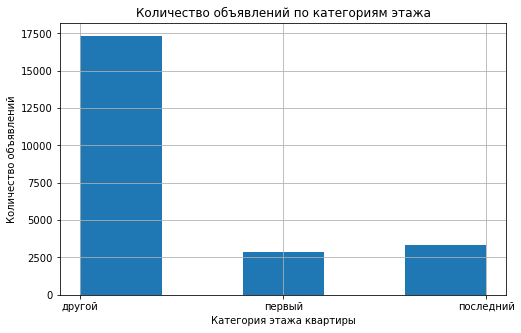

In [139]:
print(df['floor_group'].value_counts())
print_hist(df['floor_group'], 5, (8,5),'Количество объявлений по категориям этажа', 'Категория этажа квартиры', 'Количество объявлений')

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Рассчитаем данные параметры:
* `living_area_share` - отношение жилой площади к общей
* `kitchen_area_share` - отношение площади кухни к общей

In [140]:
df['living_area_share'] = df['living_area'] / df['total_area']
df['kitchen_area_share'] = df['kitchen_area'] / df['total_area']

Посмотрим основные характеристики полученного соотношения жилой площади к общей:

count    23565.000000
mean         0.565726
std          0.112041
min          0.021583
25%          0.492308
50%          0.567474
75%          0.639810
max          1.625886
Name: living_area_share, dtype: float64


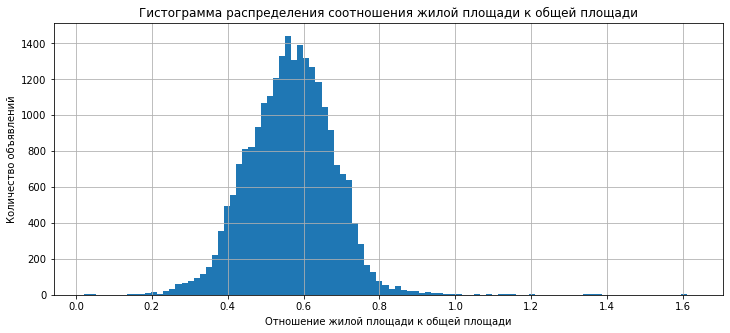

In [141]:
print(df['living_area_share'].describe())
print_hist(df['living_area_share'], 100, (12,5),'Гистограмма распределения соотношения жилой площади к общей площади', 'Отношение жилой площади к общей площади', 'Количество объявлений')

В среднем отношение жилой площади к общей составляет в районе 55%. Распределение величины очень похоже на нормальное.

Посмотрим основные характеристики полученного соотношения площади кухни к общей площади:

count    23565.000000
mean         0.191361
std          0.076174
min          0.019316
25%          0.135185
50%          0.176410
75%          0.236111
max          0.795340
Name: kitchen_area_share, dtype: float64


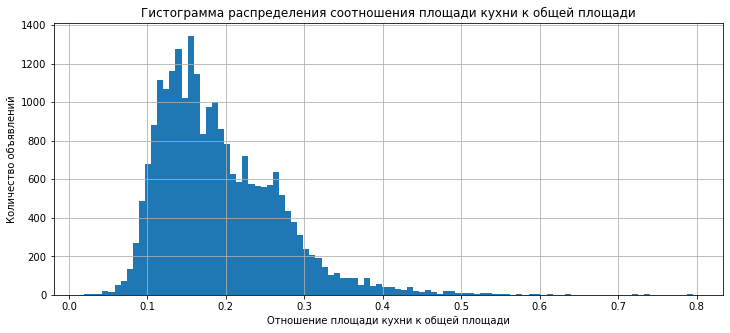

In [142]:
print(df['kitchen_area_share'].describe())
print_hist(df['kitchen_area_share'], 100, (12,5),'Гистограмма распределения соотношения площади кухни к общей площади', 'Отношение площади кухни к общей площади', 'Количество объявлений')

В среднем отношение площади кухни к общей составляет примерно 20%. Распределение величины похоже на пуассоновское.

### Выводы по шагу 3
На данном шаге были посчитаны и добавлены в таблицу следующие колонки:
1. Цена квадратного метра.
    * среднее значение - 95 тыс. руб. за кв. м.
2. День недели, месяц и год публикации объявления.
    * с каждым годом наблюдается рост количества публикуемых объявлений
    * наблюдается сезонность рынка недвижимости: он затихает в летний период, а также на новогодние и майские праздники
    * в выходные дни публикуется значительно меньшее количество объявлений
3. Этаж квартиры; варианты — первый, последний, другой.
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.
    * отношение жилой площади к общей в среднем составляет в районе 55%
    * отношение площади кухни к общей в среднем  составляет примерно 20%

## Шаг 4. Исследовательский анализ данных и выполнение инструкций <a class="anchor" id="h1_4"></a>

### 4.1. Изучение параметров: площадь, цена, число комнат, высота потолков

#### Площадь
Посмотрим описание параметра площади и построим гистограмму:

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


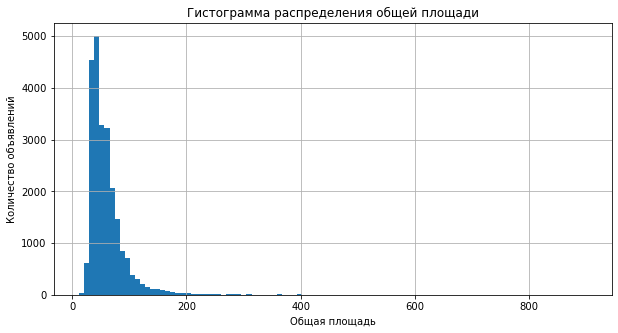

In [143]:
print(df['total_area'].describe())
print_hist(df['total_area'], 100, (10,5),'Гистограмма распределения общей площади', 'Общая площадь', 'Количество объявлений')

Распределение похоже на пуассоновское. Обычная площадь квартиры - примерно 50 кв. метров
Посмотрим, что из себя представляют объявления с очень большой площадью.

In [144]:
df.query('total_area > 300').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,exposition_year,exposition_month,exposition_weekday,floor_group,living_area_share,kitchen_area_share
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.000000,3,NaN,False,False,13.672140,1.0,Санкт-Петербург,22673.0,1771.0,2,508.0,3,366.0,62.0,302839.116719,2017,7,4,последний,0.577287,0.043130
581,20,65000000.0,365.0,2019-03-18,7,2.90,7,163.564151,7,NaN,False,False,21.998077,NaN,Санкт-Петербург,19827.0,1690.0,3,378.0,3,58.0,NaN,178082.191781,2019,3,0,последний,0.448121,0.060269
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.500000,4,NaN,False,False,26.400000,NaN,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0,103223.806572,2017,10,2,другой,0.645795,0.054557
793,20,135000000.0,310.0,2018-05-22,4,3.30,5,250.000000,2,NaN,False,False,50.000000,NaN,Санкт-Петербург,34159.0,7251.0,2,295.0,3,190.0,342.0,435483.870968,2018,5,1,другой,0.806452,0.161290
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.000000,4,NaN,False,False,16.600000,NaN,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0,68870.523416,2017,12,5,другой,0.611570,0.045730
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.000000,3,NaN,False,False,63.000000,2.0,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN,500000.000000,2018,10,4,последний,0.612903,0.203226
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5,255.700000,4,NaN,False,False,66.000000,NaN,Санкт-Петербург,23713.0,594.0,3,398.0,2,515.0,259.0,232198.142415,2017,7,0,другой,0.791641,0.204334
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6,100.009247,6,NaN,False,False,18.367649,0.0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0,149874.686717,2015,1,2,последний,0.250650,0.046034
1494,10,65000000.0,364.0,2018-11-27,7,3.90,6,250.000000,3,NaN,False,False,20.000000,NaN,Санкт-Петербург,21988.0,3254.0,0,NaN,1,689.0,46.0,178571.428571,2018,11,1,другой,0.686813,0.054945
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9,100.009247,7,NaN,False,False,18.367649,0.0,Санкт-Петербург,25593.0,5913.0,2,164.0,0,NaN,599.0,428546.973684,2015,7,4,другой,0.328978,0.060420


In [145]:
print('Количество объявлений с площадью более 300 кв. м: ',len(df.query('total_area > 300')))

Количество объявлений с площадью более 300 кв. м:  61


Все рассмотренные объявления находятся в Санкт-Петербурге, имеют высокую стоимость. Hеобходимо удалить такие аномальныя значения, чтобы они не влияли на результаты анализа. Сделаем это в п. 4.3.

#### Цена
Посмотрим описание параметра и построим гистограмму:

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


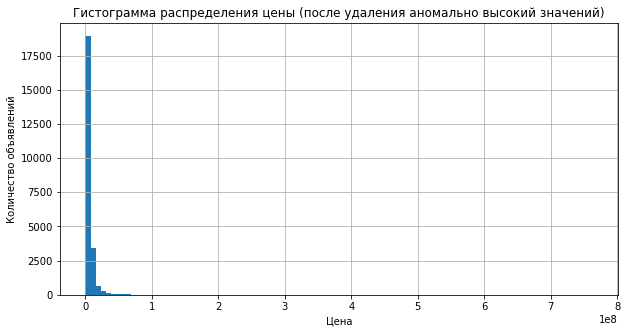

In [146]:
print(df['last_price'].describe())
print_hist(df['last_price'], 100, (10,5),'Гистограмма распределения цены (после удаления аномально высокий значений)', 'Цена', 'Количество объявлений') 

Цена большей части квартир не превышает 5 млн. рублей (смотря по медиане). Средняя же цена - около 6.5 млн. рублей. Так получается из-за того, что распределение имеет очень длинный хвост, т.е. часть предложений имеют очень высокую цену. Рассмотрим такие объявления. Например, возьмем квартиры стоимостью более 30 млн. руб.

In [147]:
df.query('last_price > 100000').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,exposition_year,exposition_month,exposition_weekday,floor_group,living_area_share,kitchen_area_share
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.00000,NaN,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.600000,1,NaN,False,False,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.300000,4,NaN,False,False,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,47.374108,9,NaN,False,False,11.29292,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,2015,7,4,другой,0.297950,0.071025
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.00000,NaN,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.400000,5,NaN,False,False,9.10000,NaN,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,2018,9,0,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.600000,6,NaN,False,False,14.40000,1.0,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,2017,11,3,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,31.731865,22,NaN,False,False,18.90000,2.0,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,2019,4,3,другой,0.443182,0.263966
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.430000,26,NaN,False,False,8.81000,NaN,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.764777,2018,5,2,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,False,False,6.50000,2.0,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,2017,2,6,другой,0.714754,0.106557


In [148]:
print('Количество объявлений квартир стоимостью выше 30 млн.рублей: ',len(df.query('last_price > 30000000')))

Количество объявлений квартир стоимостью выше 30 млн.рублей:  315


Похоже, что все эти квартиры находятся в Санкт-Петербурге. Они имеют большую площадь, многие находятся рядом с центром города. Похоже это элитная недвижимость. И таких объявлений действительно немного. Очень высокие значения цены могут сильно повлиять на результаты анализа, поэтому необходимо удалить такие записи из данных. Сделаем это в п. 4.3.

#### Число комнат

Посмотрим описание параметра и построим гистограмму:

count    23565.000000
mean         2.078888
std          1.066503
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


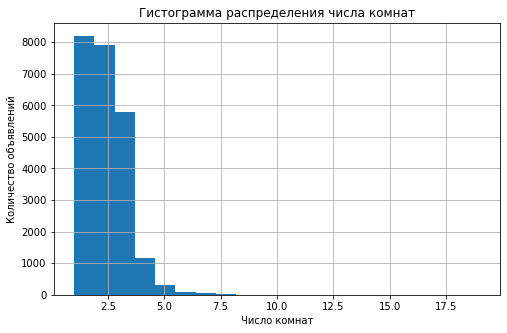

In [149]:
print(df['rooms'].describe())
print_hist(df['rooms'], 20, (8,5),'Гистограмма распределения числа комнат', 'Число комнат', 'Количество объявлений') 

Лидеры среди предложений, как можно было и ожидать - это одно-, двух- и трехкомнатные квартиры. Также, как и предыдущие параметры, данное распеделение напоминает пуассоновское и имеет длинный хвост с объявлениями о продаже квартир с большими значениями числа комнат. Посмотрим, какие объявления представлены по квартирам с числом комнат больше 7.

In [150]:
df.query('rooms > 7').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,exposition_year,exposition_month,exposition_weekday,floor_group,living_area_share,kitchen_area_share
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.800000,7,NaN,False,False,13.300000,NaN,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,95264.017420,2018,7,6,последний,0.755580,0.072401
813,7,16500000.0,229.0,2016-02-25,8,NaN,6,160.000000,5,NaN,False,False,25.000000,NaN,Санкт-Петербург,23968.0,4536.0,1,243.0,0,NaN,806.0,72052.401747,2016,2,3,другой,0.698690,0.109170
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.000000,4,NaN,False,False,16.600000,NaN,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0,68870.523416,2017,12,5,другой,0.611570,0.045730
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7,145.900000,7,NaN,False,False,18.800000,1.0,Санкт-Петербург,10726.0,12169.0,1,191.0,1,531.0,NaN,84372.707263,2018,1,3,последний,0.535216,0.068966
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6,115.800000,1,NaN,False,False,5.000000,NaN,Санкт-Петербург,21589.0,1152.0,1,587.0,2,155.0,115.0,116056.485356,2017,12,1,первый,0.605649,0.026151
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.000000,3,NaN,False,False,100.000000,NaN,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,110169.491525,2019,2,3,другой,0.693220,0.169492
7857,11,150000000.0,230.0,2017-10-25,8,NaN,8,220.000000,8,NaN,False,False,24.866667,NaN,Санкт-Петербург,25525.0,5845.0,2,116.0,0,NaN,135.0,652173.913043,2017,10,2,последний,0.956522,0.108116
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5,107.000000,1,NaN,False,False,7.200000,NaN,Санкт-Петербург,26080.0,4782.0,2,473.0,0,NaN,NaN,107333.333333,2018,7,1,первый,0.713333,0.048000
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2,160.100000,1,False,False,False,41.000000,NaN,Санкт-Петербург,17720.0,16722.0,3,471.0,2,440.0,471.0,125550.000000,2017,7,2,первый,0.402261,0.103015
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6,190.257143,3,NaN,False,False,25.071429,NaN,Санкт-Петербург,24466.0,5034.0,1,346.0,0,NaN,90.0,72340.425532,2018,7,5,другой,0.809605,0.106687


In [151]:
print('Количество объявлений квартир с количеством комнат более 7: ',len(df.query('rooms > 7')))

Количество объявлений квартир с количеством комнат более 7:  31


И вновь это квартиры в Санкт-Петербурге, которые также имеют большую стоимость и большую площадь.

#### Высота потолков

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


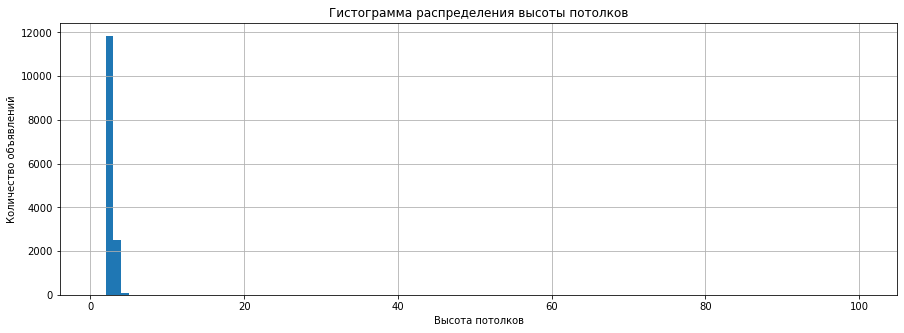

In [152]:
print(df['ceiling_height'].describe())
print_hist(df['ceiling_height'], 100, (15,5),'Гистограмма распределения высоты потолков', 'Высота потолков', 'Количество объявлений')

Видно, что подавляющее большинство квартир имеют высоту потолков 2.6-2.7 метров. Также здесь есть объявления, сильно выбивающиеся из основной выборки: имеются квартиры с аномально высокими потолками (более 5 метров) и очень низкими (минимальная высота - 1 метр).

In [153]:
print('Объявления с аномально низкими потолками (менее 2 метров):')
df.query('ceiling_height < 2').head(10)

Объявления с аномально низкими потолками (менее 2 метров):


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,exposition_year,exposition_month,exposition_weekday,floor_group,living_area_share,kitchen_area_share
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0,35046.728972,2017,8,0,первый,0.642523,0.121495
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0,102500.000000,2017,10,1,другой,0.435000,0.208500
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0,109090.909091,2018,10,2,другой,0.589091,0.181818


In [154]:
print('Объявления с аномально высокими потолками (более 5 метров):')
df.query('ceiling_height > 5').head(10)

Объявления с аномально высокими потолками (более 5 метров):


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,exposition_year,exposition_month,exposition_weekday,floor_group,living_area_share,kitchen_area_share
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.000000,2,False,False,False,9.970915,2.0,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,65217.391304,2018,7,3,другой,0.579710,0.180633
464,15,66571000.0,280.3,2015-06-11,6,5.2,8,159.500000,7,NaN,False,False,21.100000,0.0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,237499.108098,2015,6,3,другой,0.569033,0.075276
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3,190.000000,3,NaN,False,False,63.000000,2.0,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN,500000.000000,2018,10,4,последний,0.612903,0.203226
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6,100.009247,6,NaN,False,False,18.367649,0.0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0,149874.686717,2015,1,2,последний,0.250650,0.046034
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.000000,2,NaN,False,False,8.000000,NaN,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,38666.666667,2018,11,0,другой,0.706667,0.106667
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.300000,2,False,False,False,7.300000,NaN,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0,46666.666667,2018,3,4,другой,0.510000,0.243333
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.000000,2,NaN,False,False,7.000000,1.0,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,95555.555556,2018,2,3,другой,0.666667,0.155556
4876,7,3000000.0,25.0,2017-09-27,1,27.0,25,17.000000,17,NaN,False,True,9.544076,2.0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0,120000.000000,2017,9,2,другой,0.680000,0.381763
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.500000,1,True,False,False,5.500000,NaN,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,126229.508197,2018,10,2,первый,0.639344,0.180328
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.000000,3,NaN,False,False,9.000000,2.0,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,46296.296296,2017,10,4,другой,0.555556,0.166667


Каких-то общих особенностей у данных записей не видно. Возможно, они были внесены по ошибке. Обработаем эти значения в п. 4.3.

#### Выводы
На  параметры: площадь, цена, число комнат, высота потолков

* Обычная площадь квартиры - примерно 50 кв. м.
* Цена большей части квартир не превышает 5 млн. рублей. Средняя же цена - около 6.5 млн. рублей. Так получается из-за того, что распределение имеет очень длинный хвост, т.е. часть предложений имеют очень высокую цену.
* По количеству комнат больше всего одно- , двух- и трехкомнатных квартир
* Подавляющее большинство продаваемых квартир квартир имеют высоту потолков 2.6-2.7 метров
* Квартиры с аномально высокими по высоте потолков больше напоминают на ошибочно введеные данные.
* Большинство из редких и выбивающихся объявлений (по параметрам площади, цене, числу комнат) находятся в Санкт-Петербурге, имеют высокую параметры цены и площади. Похоже это элитное жилье. Такие аномальные значения удалены из выборки, чтобы они не влияли на результаты анализа.

### 4.2. Изучение времени продажи квартиры
Посмотрим статистичские характеристики данной величины и построим гистрограмму распределения:

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


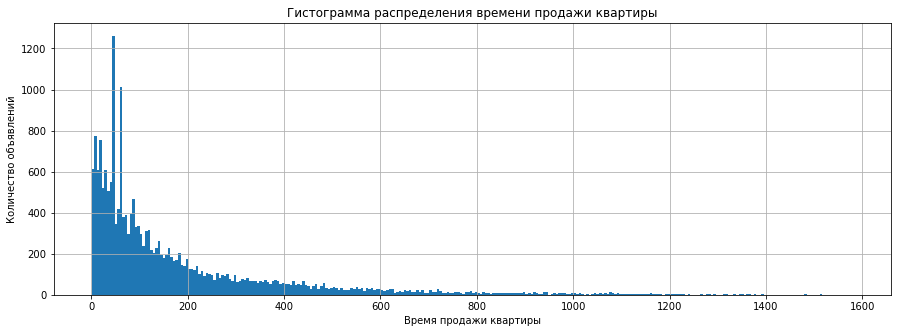

In [155]:
print(df['days_exposition'].describe())
print_hist(df['days_exposition'], 300, (15,5),'Гистограмма распределения времени продажи квартиры', 'Время продажи квартиры', 'Количество объявлений')

Среднее значение (180) больше медианы (95) почти в 2 раза, что является следствием большого длинного хвоста. Т.е. имеются объявления, которые находились в публикации длительное время, что сильно повлияло на среднее значение.

Таким образом, обычно продажа занимает около 3 месяцев.
Четверть значений оказалось не более 45 дней. Можно считать, что продажи прошли очень быстро, если объявление снято в срок до 1.5 месяцев.
Необычно долгие продажи можно посмотреть по значению верхнего квартиля - 232 дня (примерно 8 месяцев).

Также в нашей выборке присутствуют объявления с пустым значением *days_exposition*. Ранее мы предположили, что это объявления, еще не снятые с продажи. Попробуем понять, действительно ли это так. Посмотрим, сколько всего таких значений.

In [156]:
print('Количество еще не снятых с публикации объявлений',df['days_exposition'].isnull().sum())

Количество еще не снятых с публикации объявлений 3171


Посмотрим, как распределены эти значения в зависимости от времени публикации. Для этого рассчитаем количество дней с момента публикации и построим гистограмму для значений с пустым временем продажи.

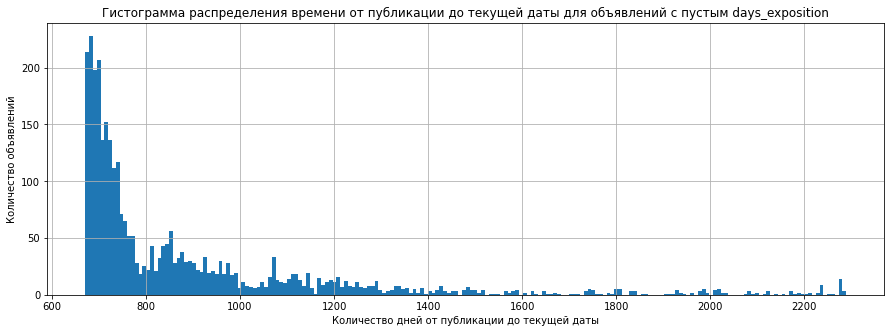

In [157]:
# получим текущую дату
today = pd.to_datetime(date.today(), format='%Y-%m-%d')
#Создадим колонку, в которой рассчитаем разницу между текущей датой и датой публикации
df['time_from_publication'] = today - df['first_day_exposition']
print_hist(df['time_from_publication'][df['days_exposition'].isnull()].dt.days, 200, (15,5),'Гистограмма распределения времени от публикации до текущей даты для объявлений с пустым days_exposition', 'Количество дней от публикации до текущей даты', 'Количество объявлений')

Похоже наша гипотеза подтвердилась. Количество записей с пустым временем продажи (*days_exposition*) резко убывает с увеличением давности объявлений, что логично: чем объявления старше, тем меньше таковых должно встречаться в данных. Т.е. записи с пустым *days_exposition* - действительно те, которые все еще опубликованы.

### 4.3. Обработка редких и выбивающихся значений (выбросов)
На шаге 4.1 мы выявил очень длинные "хвосты" в распределении изучаемых параметров. Таких объявлений немного, но они могут сильно повлиять на результаты анализа. Поэтому необходимо удалитить их.
Наиболее важными для нас параметрами являются цена и общая площадь.
#### Цена
Посмотрим подробнее на диаграмму размаха.

AxesSubplot(0.125,0.125;0.775x0.755)


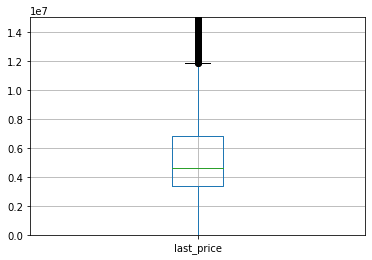

In [158]:
plt.ylim(0, 15000000)
print(df.boxplot(column=['last_price']))

Видно, как и ранее на гистограмме (см. п.1), что имеется большое количество аномально больших значений.
Обработаем данные выбросы методом выявления выбросов, разработанным Д. Тьюки и основанном на расчете межквартильного расстояния.
1. Определим нижний (Q1), верхний (Q2) квартили и межквартильный размах (IQR).
2. Далее рассчитаем нижнию и верхнюю границы для выбросов по правилу:
    * нижняя граница =  [Q1 - 1.5 * IQR]
    * верхняя граница =  [Q3 - 1.5 * IQR]

In [159]:
last_price_q1 = df['last_price'].quantile(0.25)
last_price_q3 = df['last_price'].quantile(0.75)
last_price_iqr = last_price_q3 - last_price_q1
print('Нижний квартиль:',last_price_q1)
print('Верхний квартиль:',last_price_q3)
print('Межквартильный размах:', last_price_iqr)
print('Нижняя граница для выбросов:',last_price_q1 - 1.5 * last_price_iqr)
print('Верхняя граница для выбросов:',last_price_q3 + 1.5 * last_price_iqr)
print('Количество выбросов цены квартиры: ',len(df.query('last_price > (@last_price_q3 + 1.5 * @last_price_iqr)')))

Нижний квартиль: 3400000.0
Верхний квартиль: 6790000.0
Межквартильный размах: 3390000.0
Нижняя граница для выбросов: -1685000.0
Верхняя граница для выбросов: 11875000.0
Количество выбросов цены квартиры:  2046


Нижняя граница получилась отрицательная. Отрицательная цена навряд ли может быть, поэтому с помощью данного метода мы определим для цены верхнюю границу отсечения выбросов. Уберем все значения из данных, которые больше `3Q + 1.5 * IQR`:

In [160]:
df = df.query('last_price < (@last_price_q3 + 1.5 * @last_price_iqr)')

Посмотрим еще раз на гистограмму распределения:

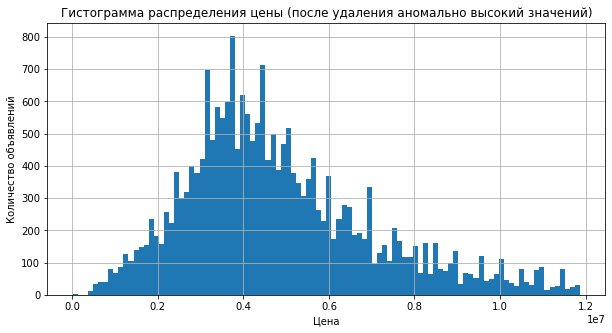

In [161]:
print_hist(df['last_price'], 100, (10,5),'Гистограмма распределения цены (после удаления аномально высокий значений)', 'Цена', 'Количество объявлений')

Теперь в распределении цены нет хвоста. Но даже на гистограмме видно, что в данных имеются аномально низкие для недвижимости значения:

In [162]:
df.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,exposition_year,exposition_month,exposition_weekday,floor_group,living_area_share,kitchen_area_share,time_from_publication
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,111.834862,2019,3,2,последний,0.293578,0.37156,715 days


Эта квартира находится в Санкт-Петербурге, она не может стоить 12 тыс. рублей. Похоже здесь просто не поставили 3 нуля, такое часто бывает в объявлениях. Умножим это значение на 1000:

In [163]:
df.loc[8793, 'last_price'] = df.loc[8793, 'last_price'] * 1000

Посмотрим еще раз, что получилось, посмотрев базовое статистическое описание параметра цены.

In [164]:
df['last_price'].describe()

count    2.151900e+04
mean     4.837680e+06
std      2.216096e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.219000e+07
Name: last_price, dtype: float64

В данных нет аномально высоких значений. Наименьшая цена выглядит правдоподобно. Среднее значение близко к медиане, значит нет большого хвоста, уводящего среднее сильно вперед.

#### Общая площадь (total_area)

Построим диаграмму размаха для данного параметра:

AxesSubplot(0.125,0.125;0.775x0.755)


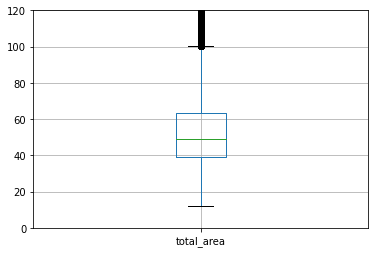

In [165]:
plt.ylim(0, 120)
print(df.boxplot(column=['total_area']))

Здесь также видны аномально большие значения. Обработаем эти выбросы также, как мы делали это для цены.

In [166]:
total_area_q1 = df['total_area'].quantile(0.25)
total_area_q3 = df['total_area'].quantile(0.75)
total_area_iqr = total_area_q3 - total_area_q1
print('Нижний квартиль:',total_area_q1)
print('Верхний квартиль:',total_area_q3)
print('Межквартильный размах:', total_area_iqr)
print('Нижняя граница для выбросов:',total_area_q1 - 1.5 * total_area_iqr)
print('Верхняя граница для выбросов:',total_area_q3 + 1.5 * total_area_iqr)
print('Количество выбросов общей площади квартиры: ',len(df.query('total_area > (@total_area_q3 + 1.5 * @total_area_iqr)')))

Нижний квартиль: 39.0
Верхний квартиль: 63.5
Межквартильный размах: 24.5
Нижняя граница для выбросов: 2.25
Верхняя граница для выбросов: 100.25
Количество выбросов общей площади квартиры:  447


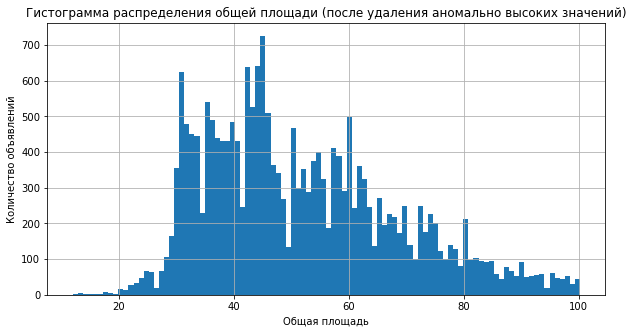

In [167]:
df = df.query('total_area < (@total_area_q3 + 1.5 * @total_area_iqr)')
print_hist(df['total_area'], 100, (10,5),'Гистограмма распределения общей площади (после удаления аномально высоких значений)', 'Общая площадь', 'Количество объявлений')

Длинный хвост удален. Теперь еще раз посмотрим на основные статистические параметры общей площади:

In [168]:
print(df['total_area'].describe())

count    21072.000000
mean        51.914788
std         16.722101
min         12.000000
25%         38.900000
50%         48.500000
75%         62.400000
max        100.200000
Name: total_area, dtype: float64


Теперь данные общей площади выглядят лучше.

#### Вывод
* Нам удалось выявить и обработать выбросы для двух важных параметров, необходимых для дальнейшего исследования - цена и общая площадь квартиры.
* С помощью применного метода не получилось определить нижнюю границу цены, за пределами которой значения можно считать выбросами - нижняя граница получилась отрицательной. Видимо для этого нужно использовать другие методы.

### 4.4. Изучение факторов, влияющих на стоимость квартиры
Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра.
Рассчитаем коэффициенты корреляции цены и данных параметров, а также посмотрим на диаграммы рассеивания по ним.

In [169]:
print('Коффициент корреляция цены и параметров')
print('- цена и общая площадь: ',df['last_price'].corr(df['total_area']))
print('- цена и число комнат: ',df['last_price'].corr(df['rooms']))
print('- цена и удаленность от центра: ',df['last_price'].corr(df['cityCenters_nearest']))

Коффициент корреляция цены и параметров
- цена и общая площадь:  0.6792438276516504
- цена и число комнат:  0.4065188442710268
- цена и удаленность от центра:  -0.3404465854925607


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


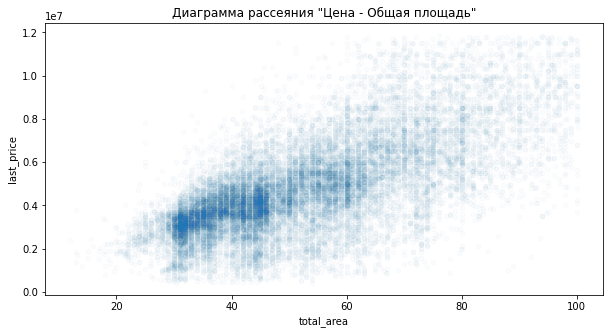

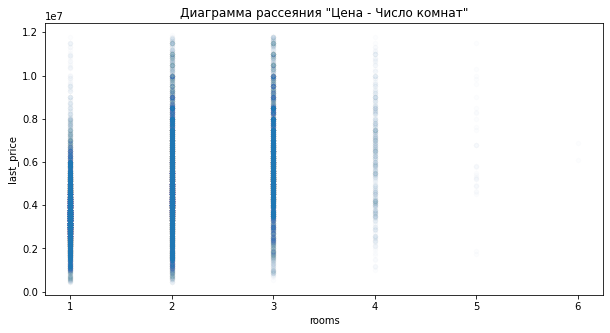

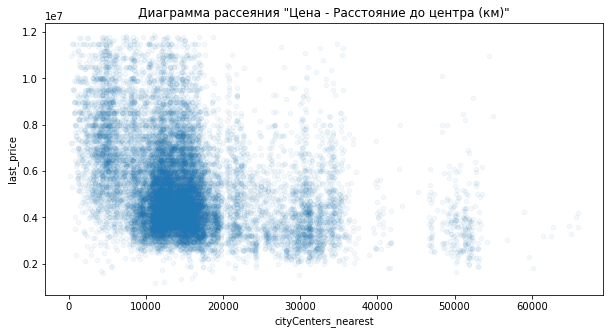

In [170]:
print(df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.02, title = 'Диаграмма рассеяния "Цена - Общая площадь"', figsize = (10,5)))
print(df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.01, title = 'Диаграмма рассеяния "Цена - Число комнат"', figsize = (10,5)))
print(df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05, title = 'Диаграмма рассеяния "Цена - Расстояние до центра (км)"', figsize = (10,5)))

Высокое влияние на цену оказывает только общая площадь. Чуть меньше цена зависит от количества комнат. А удаленность от центра не всегда оказывает большое влияние на цену - видимо здесь более важны другие факторы. Например, важное значение имеет то, в каком городе находится квартира. Если город небольшой, то удаленность от центра не так важна. Для крупных же городов этот фактор может оказывать очень сильное влияние на цену квартир.

Посмотрим, зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.
Рассчитаем средние значения цены по каждой группе:

In [171]:
df.groupby('floor_group')['last_price'].agg(['mean'])

,mean
floor_group,
другой,4.944891e+06
первый,4.060654e+06
последний,4.341688e+06


Построим столбчатую диаграмму для наглядности:

AxesSubplot(0.125,0.125;0.775x0.755)


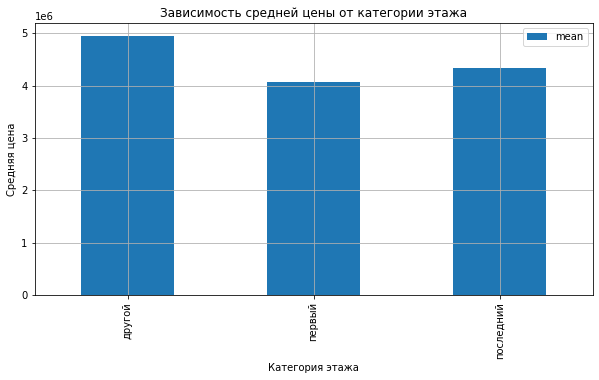

In [172]:
print_plot(df
    .groupby('floor_group')['last_price']
    .agg(['mean'])
    .sort_values(by='floor_group')
    ,'bar','Зависимость средней цены от категории этажа','Категория этажа','Средняя цена'
)

Как и ожидалось, стоимость квартир на первом и последнем этажах в среднем меньше, чем на других этажах.
При этом стоимость квартир на первых этажах значительно меньше:

In [173]:
print('Стоимость квартир на первых этажах меньше, чем на других, на {:.0%}.'.format((5.93-4.52)/5.93))
print('Стоимость квартир на последних этажах меньше, чем на других, на {:.0%}.'.format((5.93-5.5)/5.93))

Стоимость квартир на первых этажах меньше, чем на других, на 24%.
Стоимость квартир на последних этажах меньше, чем на других, на 7%.


Посмотрим, есть ли зависимость цены от даты размещения: дня недели, месяца и года.
Рассчитаем среднюю стоимость по годам, месяцам и дням недели.

AxesSubplot(0.125,0.125;0.775x0.755)


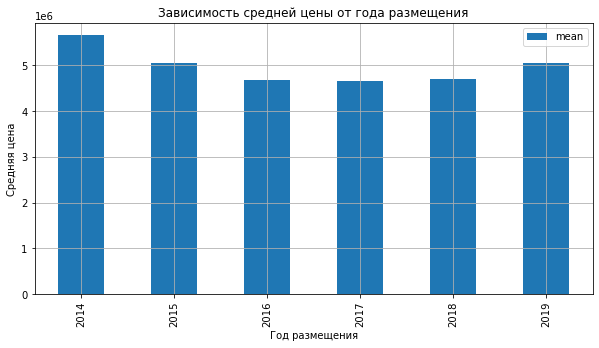

In [174]:
print_plot(df
    .groupby('exposition_year')['last_price']
    .agg(['mean'])
    .sort_values(by='exposition_year')
    ,'bar','Зависимость средней цены от года размещения','Год размещения','Средняя цена'
)

На данной диаграмме явно видно, что в 2014 году средняя стоимость квартир была значительно больше, чем в последующие годы (примерно на 35%).

AxesSubplot(0.125,0.125;0.775x0.755)


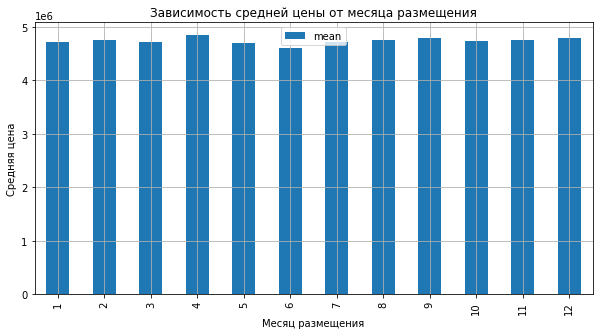

In [175]:
print_plot(df
    .groupby('exposition_month')['last_price']
    .agg(['mean'])
    .sort_values(by='exposition_month')
    ,'bar','Зависимость средней цены от месяца размещения','Месяц размещения','Средняя цена'
)

Диаграмма явно показывает, что средняя цена не зависит от месяца размещения объявления.

AxesSubplot(0.125,0.125;0.775x0.755)


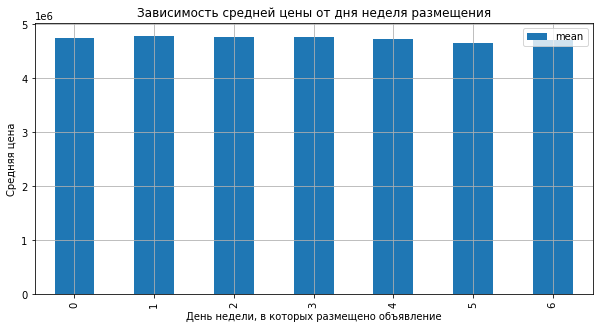

In [176]:
print_plot(df
    .groupby('exposition_weekday')['last_price']
    .agg(['mean'])
    .sort_values(by='exposition_weekday')
    ,'bar','Зависимость средней цены от дня неделя размещения','День недели, в которых размещено объявление','Средняя цена'
)

Диаграмма явно показывает, что средняя цена не зависит от дня недели, в который было размещено объявление.

### 4.5. Изучение 10 населённых пунктов с наибольшим числом объявлений
Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [177]:
popular_cities = df.groupby('locality_name')['price_meter'].agg(['count','mean']).sort_values(by='count', ascending = False).head(10)
popular_cities

,count,mean
locality_name,,
Санкт-Петербург,13328,105958.302942
посёлок Мурино,520,85673.259928
посёлок Шушары,431,78634.894570
Всеволожск,393,67205.851599
Пушкин,334,100502.849481
Колпино,332,75322.233737
посёлок Парголово,324,90494.580056
Гатчина,300,68680.532752
деревня Кудрово,297,92392.915308


Построим столбчатую диаграмму со средним значением цены квадратного метра по данным городам, отсортировав для наглядности значения по возрастанию цены кв. м:

AxesSubplot(0.125,0.125;0.775x0.755)


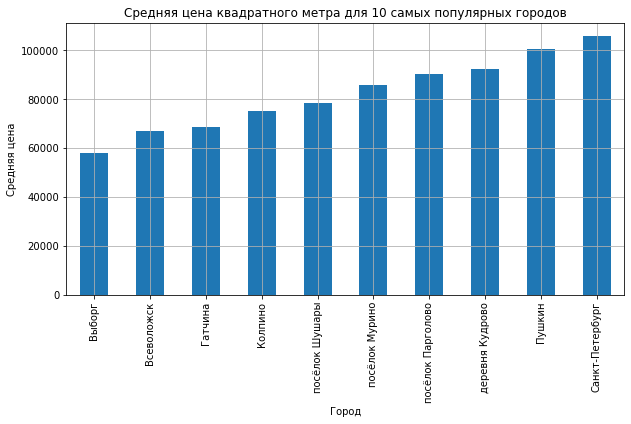

In [178]:
print_plot(popular_cities['mean']
    .sort_values()
    ,'bar','Средняя цена квадратного метра для 10 самых популярных городов','Город','Средняя цена'
)

Среди 10 самых популярных городов лидерами по средней стоимости жилья являются Санкт-Петербург, Пушкин и деревня Кудрово.
Самая низкая стоимость квадратного метра среди данной десятки в Выборге.

### 4.6. Выделение квартир в центре Санкт-Петербурга
Сначала выделим для удобства объявления по Санкт-Петербургу в отдельный датафрейм:

In [179]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
print('Количество объявлений в Санкт-Петербурге:', len(df_spb))

Количество объявлений в Санкт-Петербурге: 13328


Добавим столбец с расстоянием до центра в километрах и округлим его до целых значений (колонка *cityCenters_nearest_km*).

In [180]:
#отключение SettingWithCopyWarning (взято отсюда https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas )
pd.options.mode.chained_assignment = None
#добавление колонки cityCenters_nearest_km, ее расчет и округление
df_spb['cityCenters_nearest_km'] = np.ceil(df_spb['cityCenters_nearest'] / 1000)

Посмотрим, что получилось в результате. Построим гистограмму распределения:

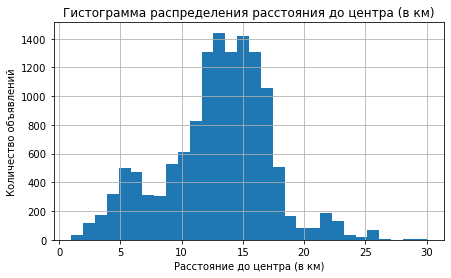

In [181]:
print_hist(df_spb['cityCenters_nearest_km'], 30, (7,4),'Гистограмма распределения расстояния до центра (в км)', 'Расстояние до центра (в км)', 'Количество объявлений')

Теперь посчитаем среднюю цену для каждого километра и выведем полученные данные на графике:

AxesSubplot(0.125,0.125;0.775x0.755)


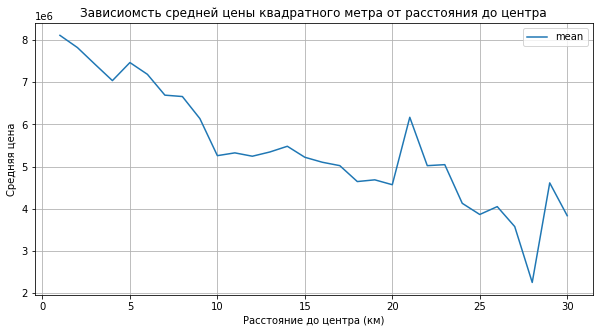

In [182]:
print_plot(df_spb
    .groupby('cityCenters_nearest_km')['last_price']
    .agg(['mean'])
    .sort_values(by='cityCenters_nearest_km', ascending = True)
    ,'line','Зависиомсть средней цены квадратного метра от расстояния до центра','Расстояние до центра (км)','Средняя цена'
)

Средняя цена сильно падает для квартир, находящихся в пределах 10 км от центра. Поэтому будем считать данное расстояние центром Санкт-Петербурга.

### 4.7. Изучение квартир в центре Санкт-Петербурга
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

#### Выделим сегмент квартир в центре Санкт-Петербурга (в пределах 10 км от центра):

In [183]:
df_spb_center = df_spb.query('cityCenters_nearest < 10000')

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Площадь в центре Санкт-Петербурга: параметры и гистограмма распределения:
count    3369.000000
mean       58.557222
std        18.775985
min        12.000000
25%        44.000000
50%        56.900000
75%        72.100000
max       100.200000
Name: total_area, dtype: float64


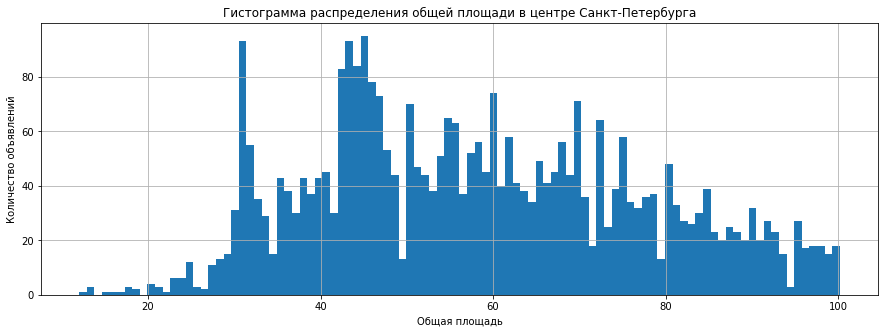

In [184]:
print('Площадь в центре Санкт-Петербурга: параметры и гистограмма распределения:')
print(df_spb_center['total_area'].describe())
print_hist(df_spb_center['total_area'], 100, (15,5),'Гистограмма распределения общей площади в центре Санкт-Петербурга', 'Общая площадь', 'Количество объявлений')

In [185]:
print('В среднем площадь квартир в центре Санкт-Петербурга больше среднего по всем объявлением на {:.0%}.'.format((df_spb_center['total_area'].median()-df['total_area'].median())/df['total_area'].median()))

В среднем площадь квартир в центре Санкт-Петербурга больше среднего по всем объявлением на 17%.


Стоимость недвижимости в центре Санкт-Петербурга: параметры и гистограмма распределения:
count    3.369000e+03
mean     6.649700e+06
std      2.208252e+06
min      1.600000e+06
25%      4.900000e+06
50%      6.500000e+06
75%      8.235000e+06
max      1.185000e+07
Name: last_price, dtype: float64


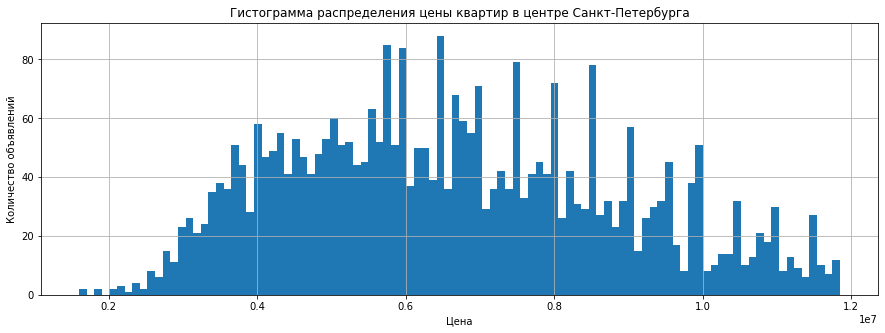

В среднем стоимость квартир в центре Санкт-Петербурга больше среднего по всем объявлением на 49%.


In [186]:
print('Стоимость недвижимости в центре Санкт-Петербурга: параметры и гистограмма распределения:')
print(df_spb_center['last_price'].describe())
print_hist(df_spb_center['last_price'], 100, (15,5),'Гистограмма распределения цены квартир в центре Санкт-Петербурга', 'Цена', 'Количество объявлений')
print('В среднем стоимость квартир в центре Санкт-Петербурга больше среднего по всем объявлением на {:.0%}.'.format((df_spb_center['last_price'].median()-df['last_price'].median())/df['last_price'].median()))

Количество комнат в центре Санкт-Петербурга: параметры и гистограмма распределения:
count    3369.000000
mean        2.091719
std         0.876362
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


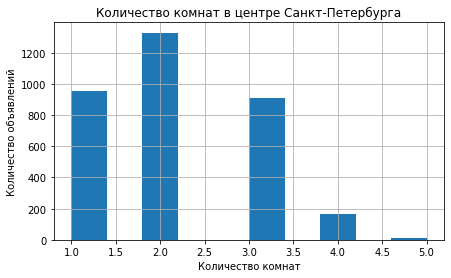

В среднем количество комнат в центре Санкт-Петербурга отличается от среднего по всем объявлением на 0%.


In [187]:
print('Количество комнат в центре Санкт-Петербурга: параметры и гистограмма распределения:')
print(df_spb_center['rooms'].describe())
print_hist(df_spb_center['rooms'], 10, (7,4),'Количество комнат в центре Санкт-Петербурга', 'Количество комнат', 'Количество объявлений')
print('В среднем количество комнат в центре Санкт-Петербурга отличается от среднего по всем объявлением на {:.0%}.'.format((df_spb_center['rooms'].median()-df['rooms'].median())/df['rooms'].median()))

Высота потолков комнат в центре Санкт-Петербурга: параметры и гистограмма распределения:
count    2156.000000
mean        2.957481
std         1.217838
min         2.400000
25%         2.650000
50%         2.850000
75%         3.100000
max        32.000000
Name: ceiling_height, dtype: float64


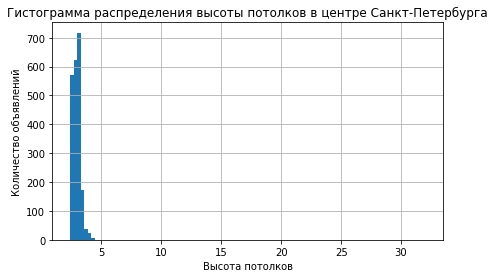

В среднем высота потолков в центре Санкт-Петербурга отличается от среднего по всем объявлением на 10%.


In [188]:
print('Высота потолков комнат в центре Санкт-Петербурга: параметры и гистограмма распределения:')
print(df_spb_center['ceiling_height'].describe())
print_hist(df_spb_center['ceiling_height'], 100, (7,4),'Гистограмма распределения высоты потолков в центре Санкт-Петербурга', 'Высота потолков', 'Количество объявлений')
print('В среднем высота потолков в центре Санкт-Петербурга отличается от среднего по всем объявлением на {:.0%}.'.format((df_spb_center['ceiling_height'].median()-df['ceiling_height'].median())/df['ceiling_height'].median()))

####  Изучим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
Чтобы оценить зависимость цены от площади, числа комнат, удаленности от центра, рассчитаем коэффициенты корреляции и построим диаграммы рассеяния:

Коффициенты корреляции:
- цена и общая площадь:  0.7455450784653214
- цена и число комнат:  0.4556724076569213
- цена и удаленность от центра:  -0.3392836494065741
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


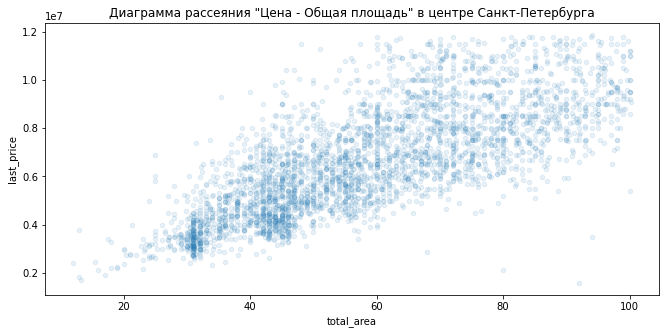

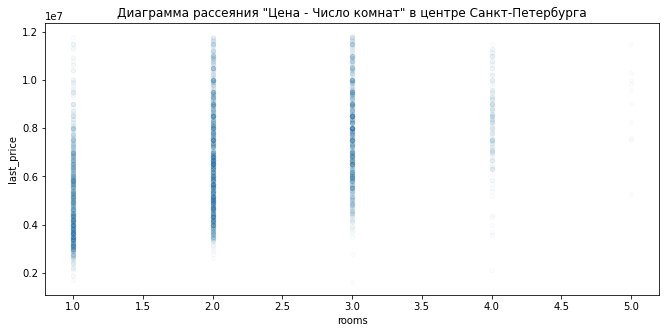

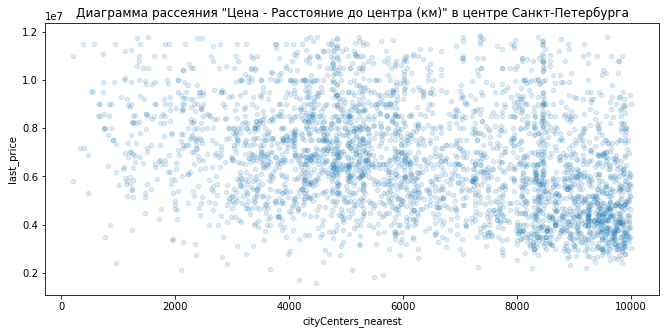

In [189]:
print('Коффициенты корреляции:')
print('- цена и общая площадь: ',df_spb_center['last_price'].corr(df_spb_center['total_area']))
print('- цена и число комнат: ',df_spb_center['last_price'].corr(df_spb_center['rooms']))
print('- цена и удаленность от центра: ',df_spb_center['last_price'].corr(df_spb_center['cityCenters_nearest']))

print(df_spb_center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, title = 'Диаграмма рассеяния "Цена - Общая площадь" в центре Санкт-Петербурга', figsize = (11,5)))
print(df_spb_center.plot(x='rooms', y='last_price', kind='scatter', alpha=0.02, title = 'Диаграмма рассеяния "Цена - Число комнат" в центре Санкт-Петербурга', figsize = (11,5)))
print(df_spb_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.15, title = 'Диаграмма рассеяния "Цена - Расстояние до центра (км)" в центре Санкт-Петербурга', figsize = (11,5)))

В целом зависимость осталась такой же, как и для общих данных.

Теперь посмотрим, как влияет этаж на среднюю стоимость:

AxesSubplot(0.125,0.125;0.775x0.755)


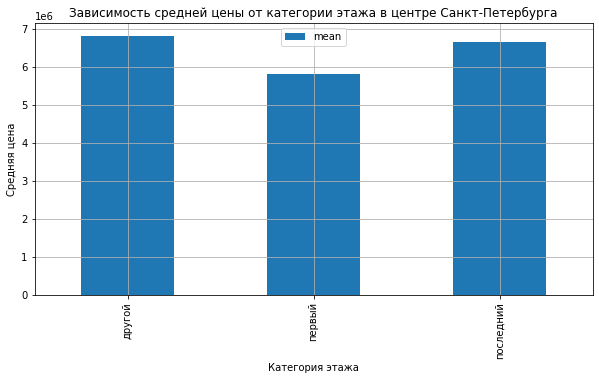

In [190]:
print_plot(df_spb_center
    .groupby('floor_group')['last_price']
    .agg(['mean'])
    .sort_values(by='floor_group')
    ,'bar','Зависимость средней цены от категории этажа в центре Санкт-Петербурга','Категория этажа','Средняя цена', (10,5)
)

Первые этажи все также стоят значительно дешевле середенных. Стоимость же последних этажей сравнялась с середенными. Похоже петербуржские крыши ценятся. В центре много старых домов с мансардами на последних этажах. Это может добавлять к стоимости квартир.

Посмотрим, есть ли зависимость цены от даты размещения: дня недели, месяца и года. Рассчитаем среднюю стоимость по годам, месяцам и дням недели.

AxesSubplot(0.125,0.125;0.775x0.755)


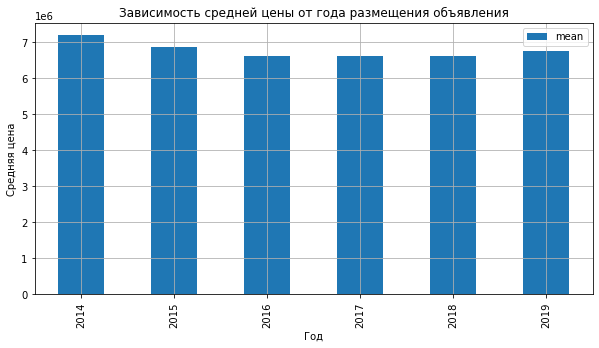

In [191]:
print_plot(df_spb_center
    .groupby('exposition_year')['last_price']
    .agg(['mean'])
    .sort_values(by='exposition_year')
    ,'bar','Зависимость средней цены от года размещения объявления','Год','Средняя цена'
)

AxesSubplot(0.125,0.125;0.775x0.755)


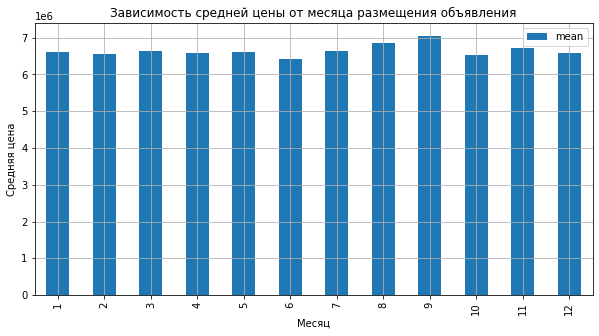

In [192]:
print_plot(df_spb_center
    .groupby('exposition_month')['last_price']
    .agg(['mean'])
    .sort_values(by='exposition_month')
    ,'bar','Зависимость средней цены от месяца размещения объявления','Месяц','Средняя цена'
)

Также, как и для всех объявлений, диаграмма показывает, что средняя цена не зависит от месяца размещения объявления.

AxesSubplot(0.125,0.125;0.775x0.755)


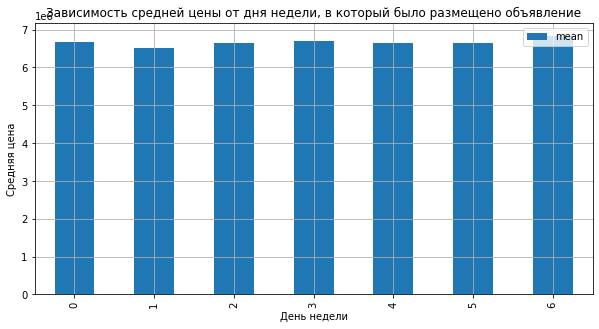

In [193]:
print_plot(df_spb_center
    .groupby('exposition_weekday')['last_price']
    .agg(['mean'])
    .sort_values(by='exposition_weekday')
    ,'bar','Зависимость средней цены от дня недели, в который было размещено объявление','День недели','Средняя цена'
)

Также, как и для всех объявлений, диаграмма показывает, что средняя цена не зависит от дня недели, в который было размещено объявление.

### Выводы по шагу 4
1. Изучены параметры: площадь, цена, число комнат, высота потолков
    * Обычная площадь квартиры - примерно 50 кв. м.
    * Цена большей части квартир не превышает 5 млн. рублей. Средняя же цена - около 6.5 млн. рублей. Так получается из-за того, что распределение имеет очень длинный хвост, т.е. часть предложений имеют очень высокую цену.
    * По количеству комнат больше всего одно- , двух- и трехкомнатных квартир
    * Подавляющее большинство продаваемых квартир квартир имеют высоту потолков 2.6-2.7 метров
    * Квартиры с аномально высокими по высоте потолков больше напоминают на ошибочно введеные данные.
    * Большинство из редких и выбивающихся объявлений (по параметрам площади, цене, числу комнат)  находятся в Санкт-Петербурге, имеют высокую параметры цены и площади. Похоже это элитное жилье. Такие аномальные значение удалены из выборки, чтобы они не влияли на результаты анализа.
    
2. Изучено время продажи квартиры: 
    * Построена гистограмма, посчитаны среднее и медиана.
    * Обычно продажа занимает около 3 месяцев. 
    * Можно считать, что продажи прошли очень быстро, если объявление снято в срок до 1.5 месяцев
    * Необычно долгие продажи можно посмотреть по значению верхнего квартиля - 232 дня (примерно 8 месяцев).
3. Обработка выбросов:
    * Удалось выявить и обработать выбросы для двух важных параметров, необходимых для дальнейшего исследования - цена и общая площадь квартиры.
    * С помощью применного метода (расчет межквартильного размаха) не получилось определить нижнюю границу цены, за пределами которой значения можно считать выбросами - нижняя граница получилась отрицательной. Видимо для этого нужно использовать другие методы.
4. Изучено влияение различных факторов на стоимость квартиры :
	* Больше всего цена зависит от площади квартиры
	* Среднее влияение оказывает количество комнат, но скорее всего это следствие того, что квартиры с большим количеством комнат имеют больше площадь
	* Удаленность от центра оказывает низкое влияние на цены.
5. Изучена зависимость цены от того, на каком этаже расположена квартира:
	* Стоимость квартир на первых этажах меньше, чем на других, на 24%.
	* Стоимость квартир на последних этажах меньше, чем на других, на 7%.
6. Изучена зависимость от даты размещения:
	* в 2014 году средняя стоимость квартир была значительно больше, чем в последующие годы (примерно на 35%)
	* месяц размещения объявления в среднем не влияет на цену квартир
	* день недели, в который размещаются объявления, в среднем не влияет на цену квартир

7. Изучены 10 населённых пунктов с наибольшим числом объявлений
	* рассчитана средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
	* среди выделленых 10 населенных пунктов лидерами по средней стоимости жилья являются Санкт-Петербург, Пушкин и деревня Кудрово. Самая низкая стоимость квадратного метра в Выборге

8. Выделены квартиры в центре Санкт-Петербурга:
	* показано, что средняя стоимость квартир резко падает у объектов в пределах 10 км от центра. Данное расстояние выбрано в качестве границы центральной зоны.
	
9. Изучены квартиры в центре Санкт-Петербурга:
	* выделены квартиры в центре Санкт-Петербурга
	* изучены следующие параметры в центре:
		* площадь - в среднем площадь квартир в центре Санкт-Петербурга больше среднего по всем объявлением на 33%.
		* цена - в среднем стоимость квартир в центре Санкт-Петербурга больше среднего по всем объявлением на 70%.
		* число комнат - предложения по числу комнат в среднем не отличаются от общих данных
		* высота потолков - предложения по высоте потолков в среднем не отличаются от общих данных
	* Изучены факторы, которые влияют на стоимость квартиры 
		* зависимость цены от числа комнат, общей площади и удаленности от центра в целом осталась на том же уровне, что и для общих данных
		* квартиры на первых этажах все также стоят значительно дешевле квартир на середенных этажах. Стоимость же жилья на последних этажах сравнялась со стоимостью на середенных.
		* Изучена зависимость от даты размещения. По сравнению с общими данным она осталась такой же:
			* в 2014 году средняя стоимость квартир также была значительно больше, чем в последующие годы (примерно на 35%)
			* месяц размещения объявления также в среднем не влияет на цену квартир
			* день недели, в который размещаются объявления, в среднем также не влияет на цену квартир

## Шаг 5. Общий вывод <a class="anchor" id="h1_5"></a>

Проведенный анализ позволил ответить на изначально поставленные вопросы:
 1. Какие факторы оказывают влияние на стоимость квартир:
     * сильно влияет на стоимость квартир площадь помещения
     * менее сильное влияение оказывает количество комнат, но скорее всего это следствие того, что квартиры с большим количеством комнат имеют больше площадь
     * квартиры на первом и последнем этажах стоят дешевле
     * удаленность от центра оказывает низкое влияние на цену недвижимости
     * в различные года средняя стоимость недвижимости отличается, что обусловлено различными факторами в экономике
     * высокая стоимость жилья не всегда бывает в крупных городах. Это могут быть и небольшие поселения. Но часто они находятся в непосредственно близости от крупных городов.
 2. Анализ параметров недвижимости позволил обнаружить границы, в которых начинаются аномалий, что позволит построить автоматизированную систему, которая будет отслеживать данные аномалии и мошенническую деятельность.
 3. Природа аномалий в данных может иметь разный характер:
     * аномалии могут быть связаны с ошибками пользователей при занесении объявлений (например, высота потолков)
     * аномалии могут быть вызваны чрезвычайно высокими характеристиками продаваемой недвижимости (например, площадь, цена, число комнат). Зачастую это характерно для элитных квартир с высокой стоимостью, площадью, числом комнат
     * аномалии в виде пропусков могут быть следствием различных причин:
         * ошибок в работе системы, определящей некоторые параметры автоматически (например, пропуски в параметре удаленности от центра)
         * пользователи не заполняют некоторые параметры по незнанию или намеренно (например, признак апартаментов)